# TITANIC

## Introduction

Background story...

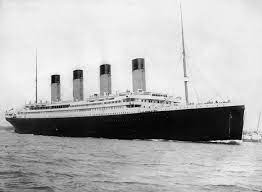



## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import sklearn.tree as skTree
import sklearn.metrics as skMetrics
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

## Subtitle

In [6]:
# from google.colab import files
# uploaded = files.upload()

In [7]:
# import io
# df2 = pd.read_csv(io.BytesIO(uploaded['titanictrain.csv']))

# Importing the dataset with read_csv and displaying the data.


In [8]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

df = pd.read_csv("titanictrain.csv")
df.head(5)  # Used to display top 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail(5) # Used to display last 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# **Data** **Exploration**

# Accessing specific coloums which are needed.

In [10]:
# Clean Train Data
df= df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Get more information about the database by using describe method.

In [11]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# find columns with nan in Training set
for NAN in df.columns:
    if df[NAN].isna().any()==True:
        print("Total mising values in {} for Training data is". format(NAN))
        print(df[NAN].isna().sum())

Total mising values in Age for Training data is
177
Total mising values in Embarked for Training data is
2


In [13]:
#Clean Train Data
df['Age'].fillna(df['Age'].mean(), inplace=True)
#deleting the 2 missing values for embarked
df=df[df['Embarked'].isna()==False]
df.head(10)

<ipython-input-13-99465eb970a9>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [14]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Counting the occurences of variables


In [15]:
df["Sex"].value_counts()


,count
Sex,
male,577
female,312


# Using .nunique() to count number of unique values that occur in dataset or in a column

In [16]:
df.nunique()

,0
Survived,2
Pclass,3
Sex,2
Age,89
SibSp,7
Parch,7
Fare,247
Embarked,3


# Filtering

**AND operator**

In [17]:
df_age = df["Age"] < 50
df_sex_mask = df["Sex"] == "female"
df[df_age & df_sex_mask].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


**OR operator**

In [18]:
df_sex = df["Sex"] == "Male"
df_age_mask = df["Age"] > 70
df[df_sex | df_age_mask]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S


# Calculating how many passengers survived.
Here 1 = survived, and 0 = Not survived.


In [19]:
count = df['Survived'].value_counts()
print(count)
# Let us see that in percentage.

percentage = df['Survived'].value_counts() * 100 / len(df)
print(percentage)

Survived
0    549
1    340
Name: count, dtype: int64
Survived
0    61.754781
1    38.245219
Name: count, dtype: float64


In [20]:
# CAlculate how many male and female survived
count_1 = pd.crosstab(df['Sex'], df['Survived'])
print(count_1)


Survived    0    1
Sex               
female     81  231
male      468  109


<Axes: xlabel='Survived'>

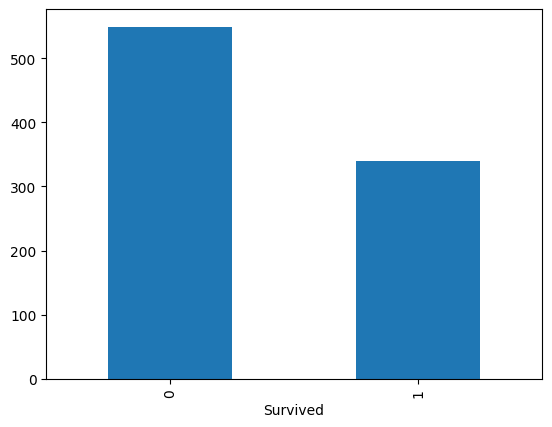

In [21]:
%matplotlib inline
color = 0.5
df['Survived'].value_counts().plot(kind = 'bar')

In [22]:
# %% now lets view data types to the features
print(df.dtypes)

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


In [23]:
# %% now lets assign data types to the features
Integer_features=['Age','SibSp','Parch']
Categorical_features=['Pclass','Sex','Embarked']

for FEATURES in Integer_features:

    df[FEATURES] = df[FEATURES].astype('int64')

for FEATURES in Categorical_features:
    df[FEATURES] = df[FEATURES].astype('category')

In [24]:
# %% now lets view data types to the features
print(df.dtypes)

Survived       int64
Pclass      category
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


# Splitting the Dataset

Vertical Split

In [25]:
# %% now lets separate the label from the Training data set
TargetLabel=df['Survived']
# now we will remove the target label (Survived from the training clean data set)
df= df.drop(['Survived'],axis=1)

In [26]:
# # %% now lets convert this categorical varibales into numerical by creating dummy variables. One hot encoding
# ## even though Pclass is in numbers, we would still convert into dummy varibales because the three classes is not ordinal
for FEATURES in Categorical_features:
    df = pd.concat([df, pd.get_dummies(df[FEATURES], prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)

In [27]:
df.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,False,False,True,False,True,False,False,True
1,38,1,0,71.2833,True,False,False,True,False,True,False,False
2,26,0,0,7.9250,False,False,True,True,False,False,False,True
3,35,1,0,53.1000,True,False,False,True,False,False,False,True
4,35,0,0,8.0500,False,False,True,False,True,False,False,True


Horizontal Split

In [28]:
# %% lets split the training data into training and validation data
X_train, X_test, y_train, y_test = train_test_split(df, TargetLabel, test_size=0.25, random_state=42)

In [29]:
X_test.shape

(223, 12)

In [30]:
X_train.shape

(666, 12)

# **Choosing the Right ML Model**

# Decision Trees

In [31]:
#Importing Libraries
# import joblib
import pandas as pd
from sklearn import tree

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning)
# warnings.filterwarnings('ignore', category=DeprecationWarning)

In [32]:
#Fitting the Model and Evaluating
dtree = tree.DecisionTreeClassifier()

In [33]:
dtree.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
y_pred = dtree.predict(X_test)


In [35]:


# # Print the predicted labels
# print("Predicted Labels:\n", y_pred)


In [36]:


# Create a DataFrame to display actual and predicted labels side by side
predictions_df = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

# Display the DataFrame
print(predictions_df)


     Actual Labels  Predicted Labels
281              0                 0
435              1                 1
39               1                 0
418              0                 0
585              1                 1
..             ...               ...
425              0                 0
102              0                 0
200              0                 0
399              1                 1
669              1                 1

[223 rows x 2 columns]


In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7668161434977578
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       141
           1       0.67      0.72      0.69        82

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.75       223
weighted avg       0.77      0.77      0.77       223

Confusion Matrix:
 [[112  29]
 [ 23  59]]


**Define the metrics in the report**


**Accuracy**: is the ratio of the number total true predicted for survived passenger and total true predicted for NOT survived passenger divide for the total of the test. This measures how often the model makes accurate for predictions.

**Precision**: is the ratio to measure how accurate the model's positive predicted are. Dividing the number of true positives by sum of true positives and false positives.

**Recall**: measure how well the model identifies all the actual survivors. Dividing the number of true positives by sum of true positive and false negatives. In this case, dividing true survivor by sum of true survival and false not survival.

**Confusion Matrix**: the table showing:
- True Positives: Correct predicted survivor
- False Positives: Incorrectly predicted survivor
- True Negatives: Correctly predicted NOT survivor
- False Negatives: Incorrectly predicted NOT survivor

# Try other Models: Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier


In [39]:
rf = RandomForestClassifier()

Repeat steps and generate report

# kNN

In [40]:
#importing Libraries
from sklearn.neighbors import KNeighborsClassifier


In [41]:
#Fitting the Model and Evaluating
knn = KNeighborsClassifier()

In [42]:
#knn looking better than both Decision Tree  and Random Forest on training set. But the validation scores are way ( Overfitting problems maybe?)

# AutoEDA Using SweetViz

In [43]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 49.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


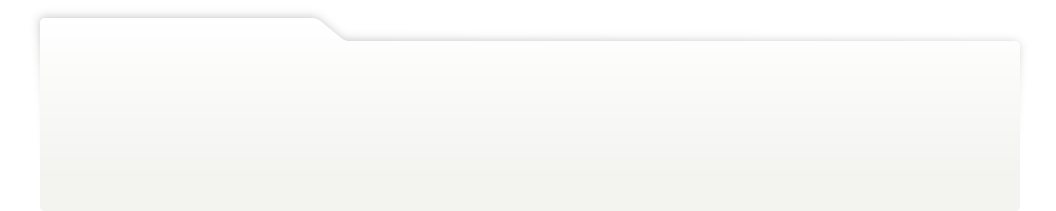
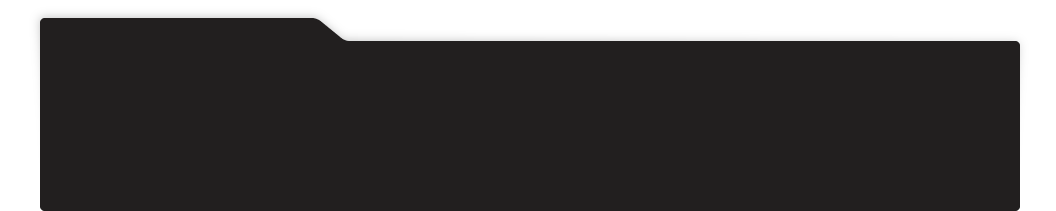
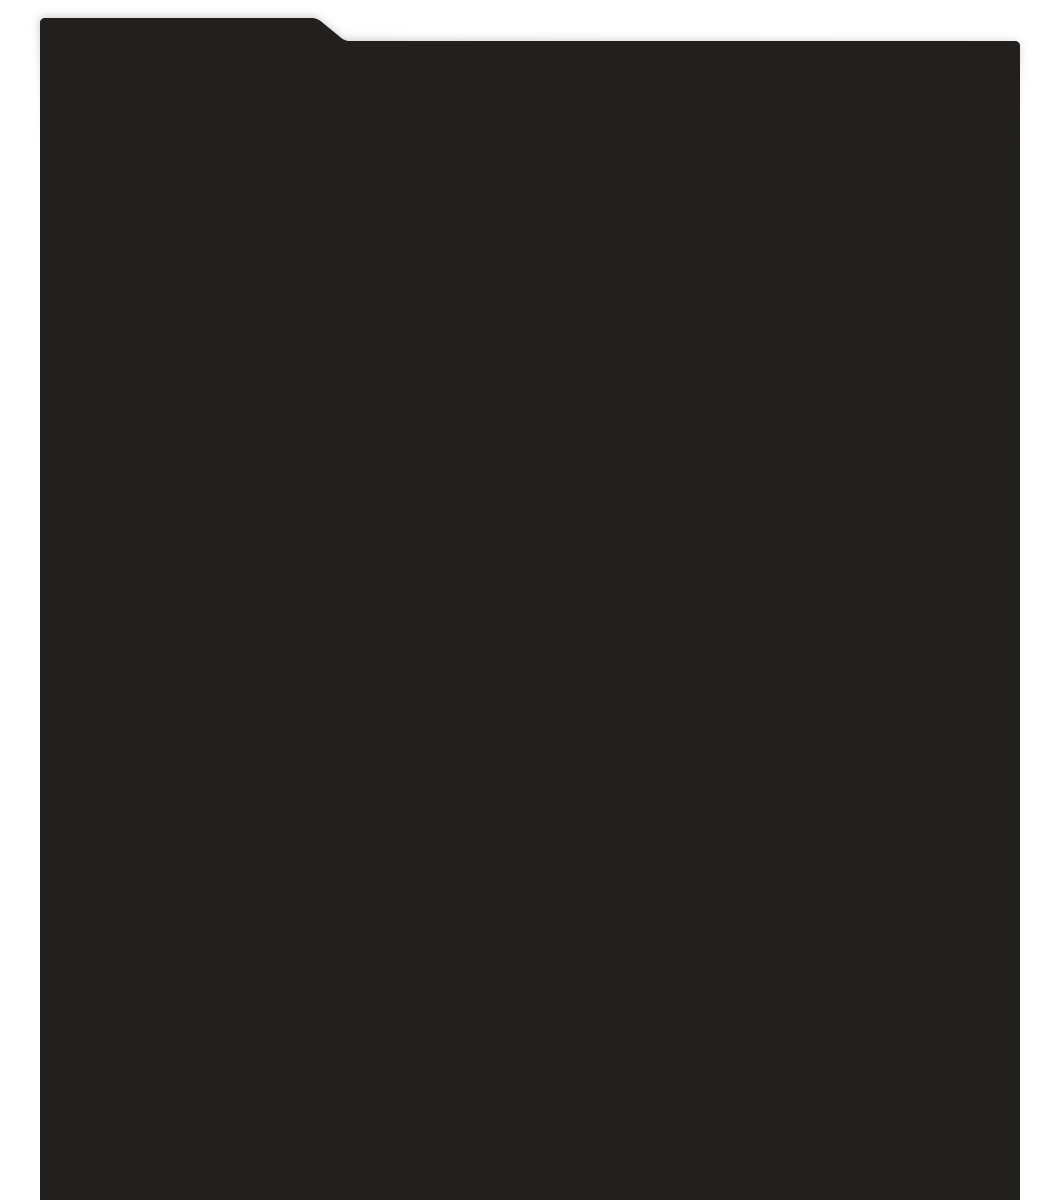
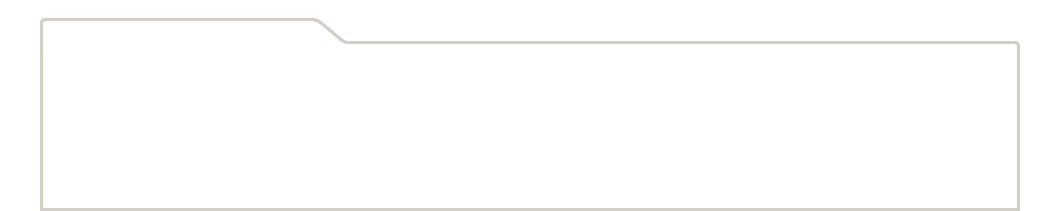
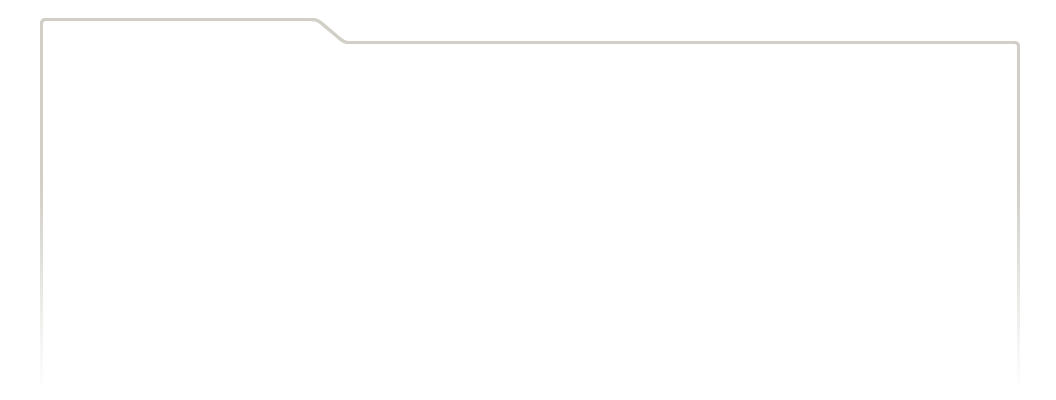
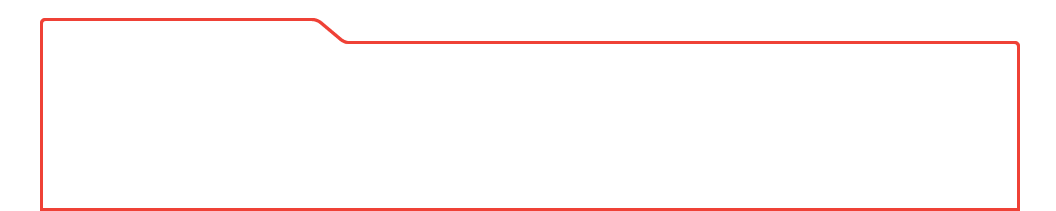
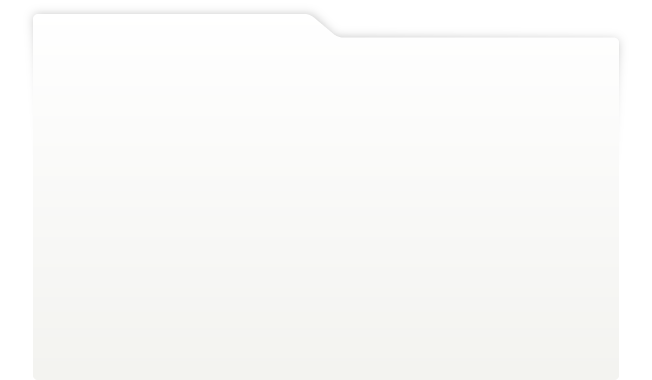
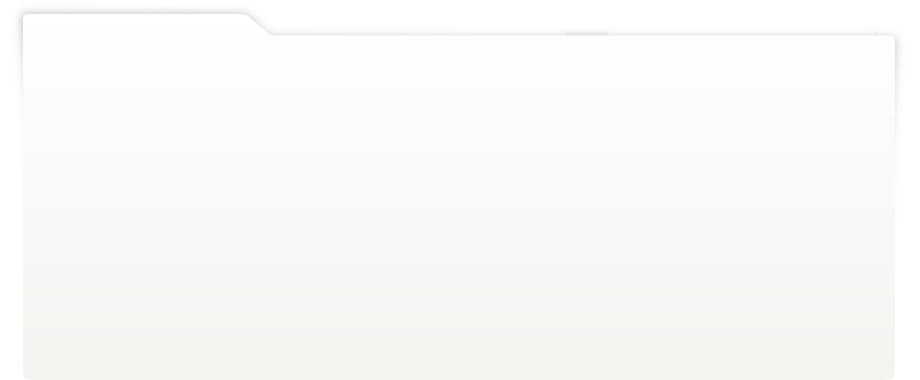
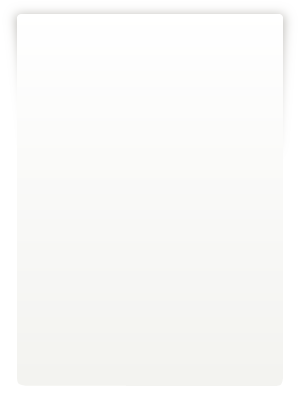
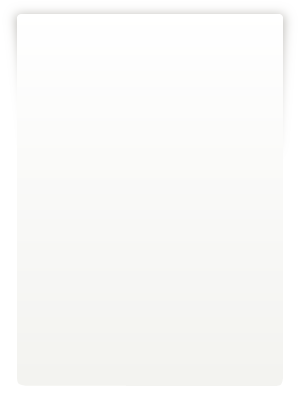
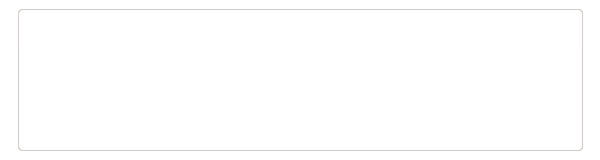
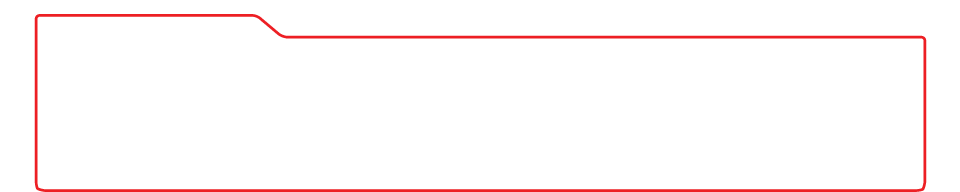
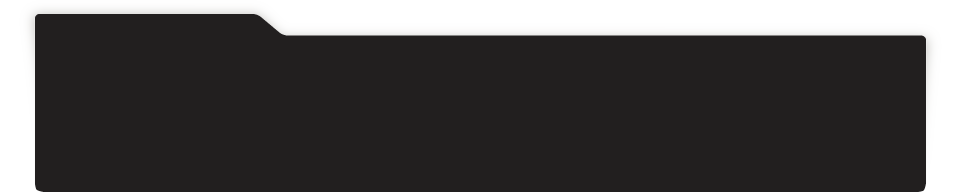
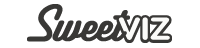
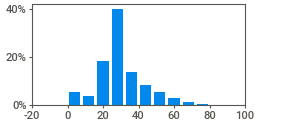
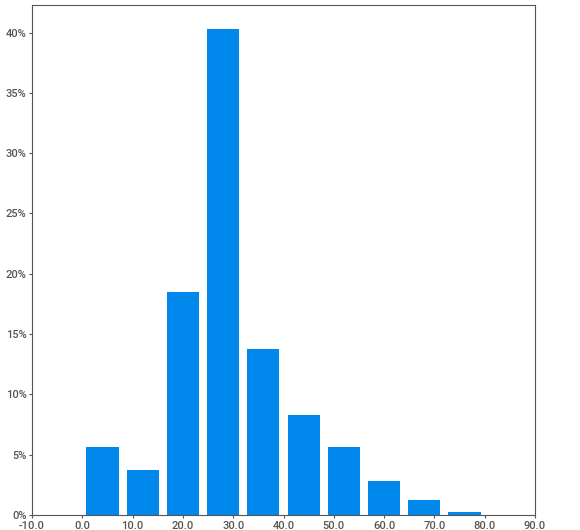
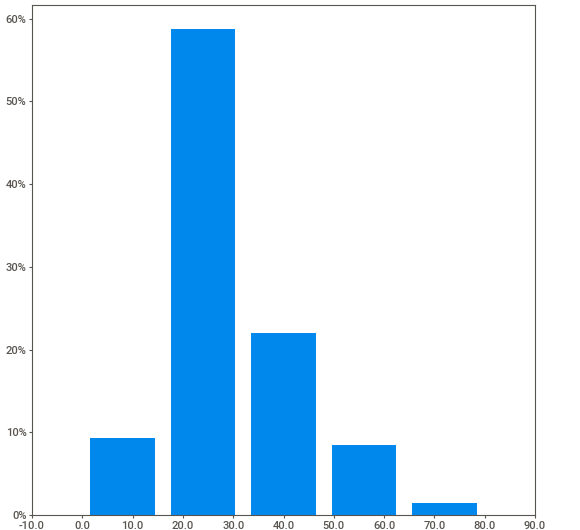
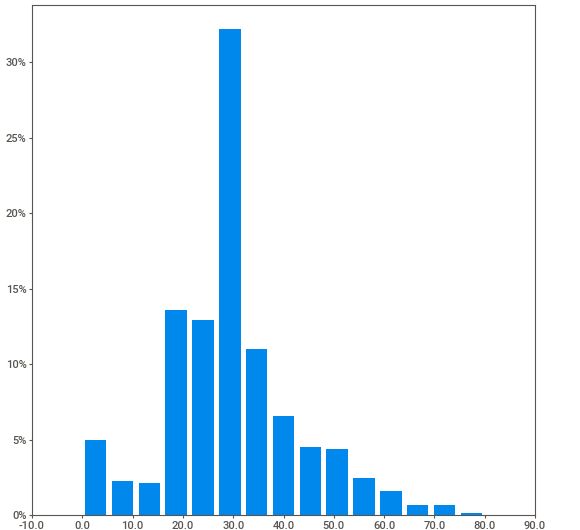
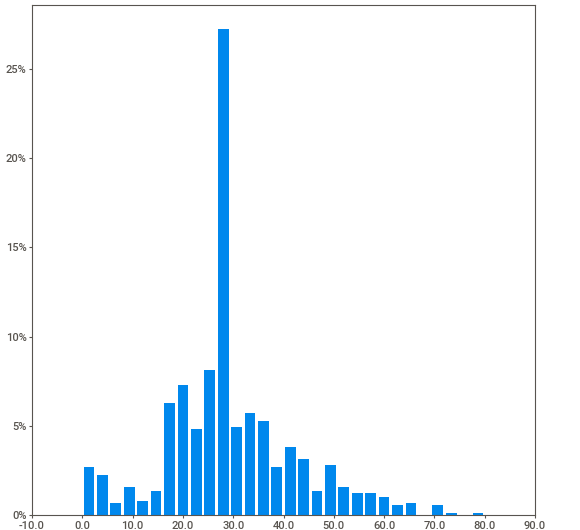
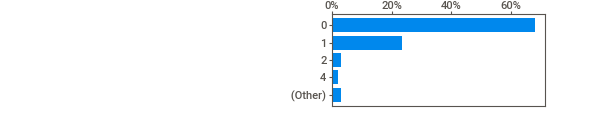
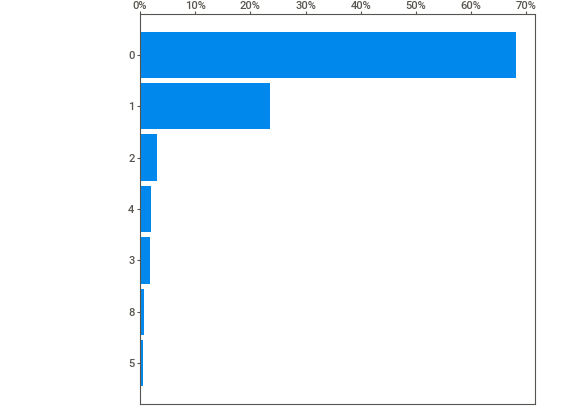
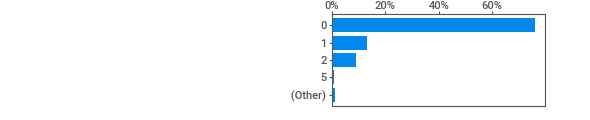
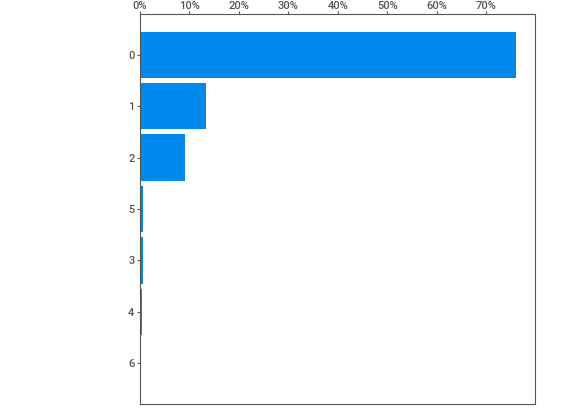
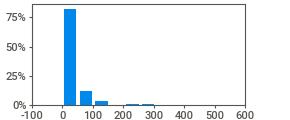
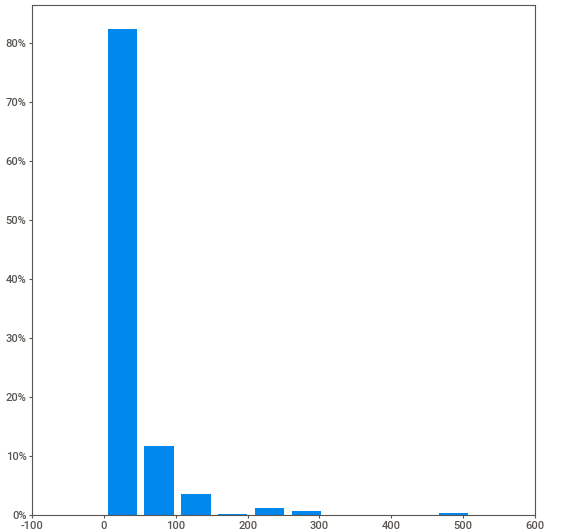
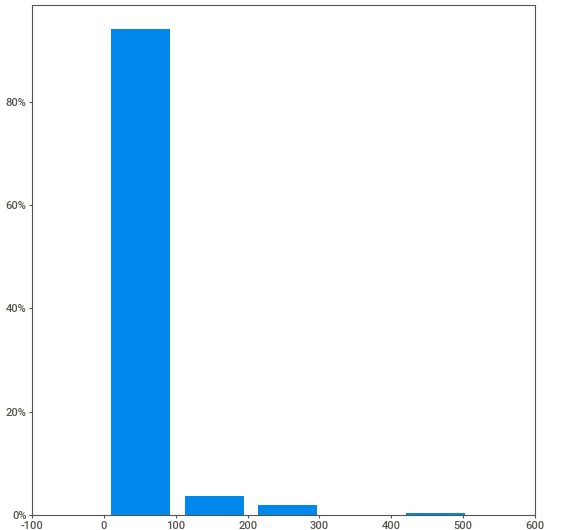
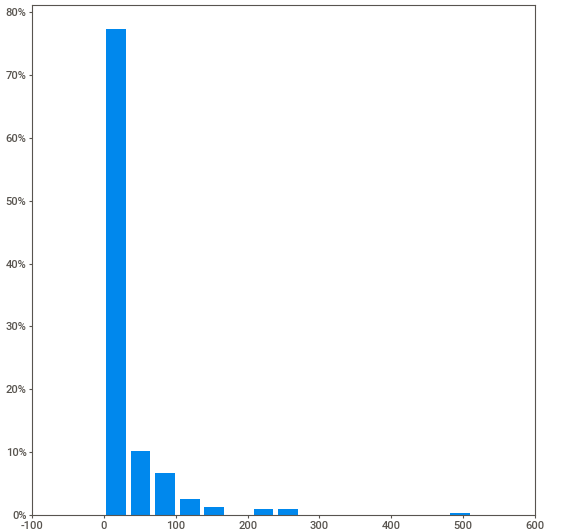
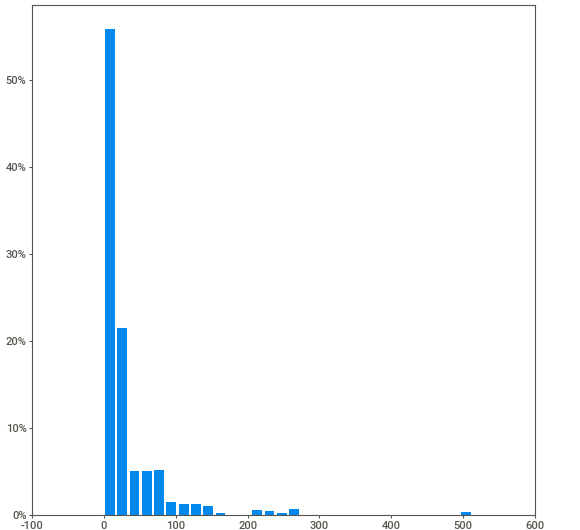
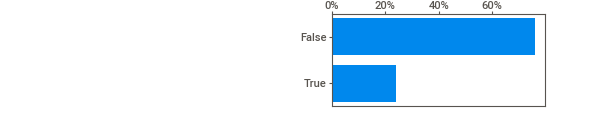
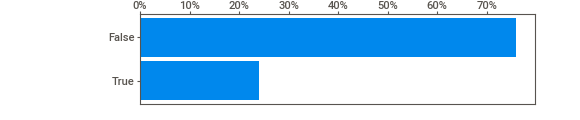
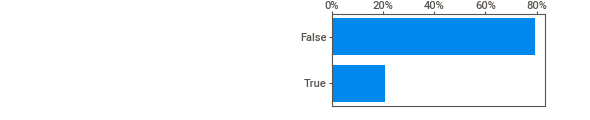
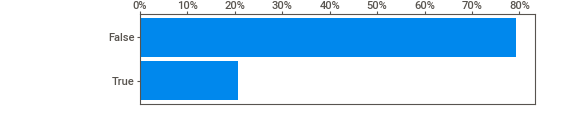
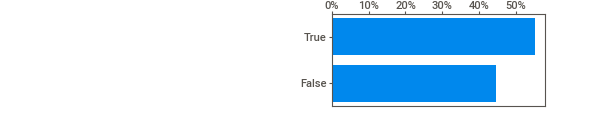
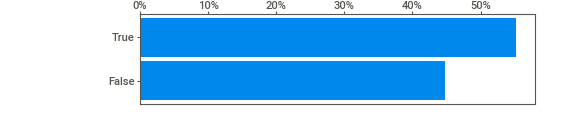
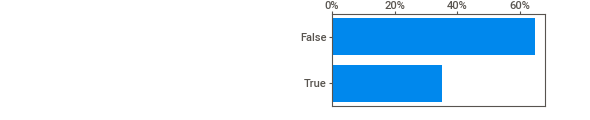
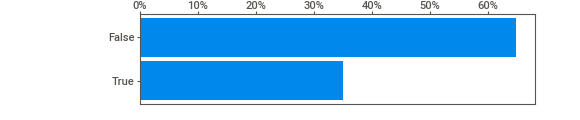
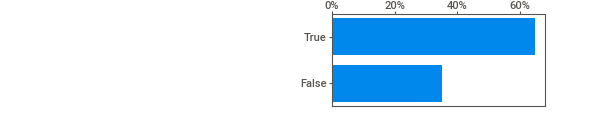
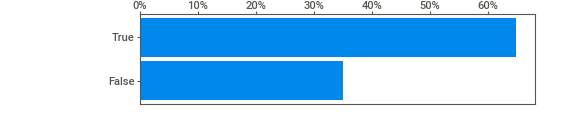
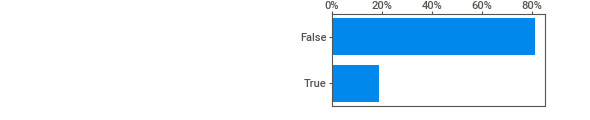
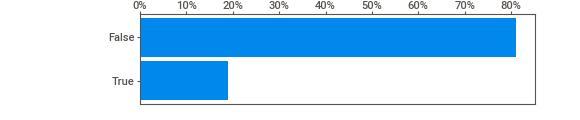
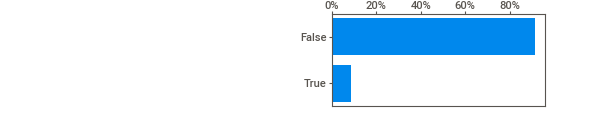
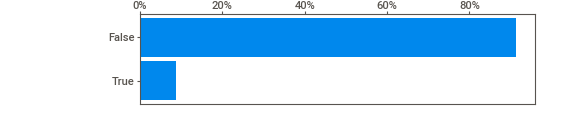
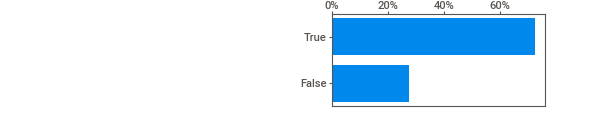
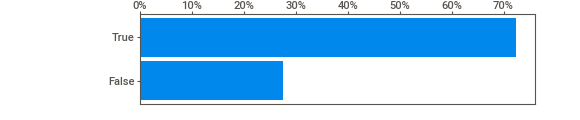
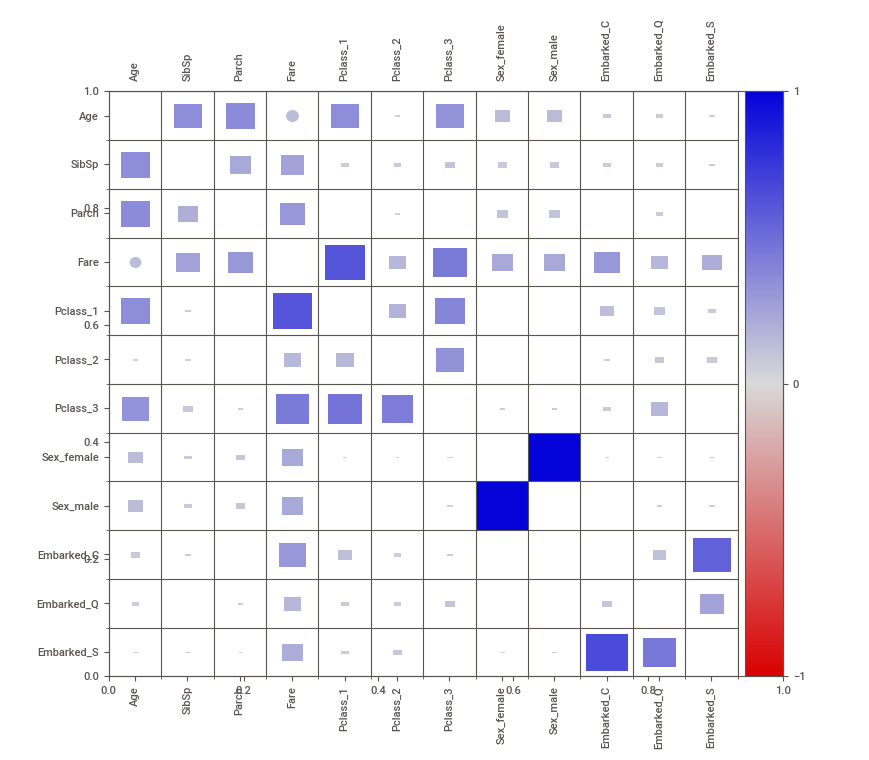
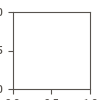

In [44]:
import sweetviz as sv

orig_data_report = sv.analyze(df)
orig_data_report.show_notebook()

# Interview Readiness Questions

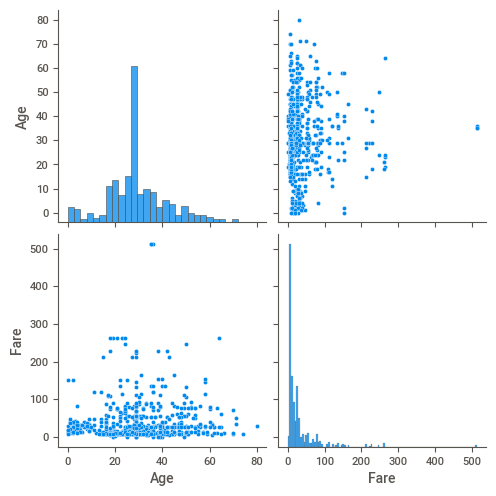

In [45]:
# 7.Example for pairplot
import seaborn as sns
import matplotlib.pyplot as plt
df_AgeFare = df[['Age','Fare']].dropna()
sns.pairplot(df_AgeFare)
plt.show()

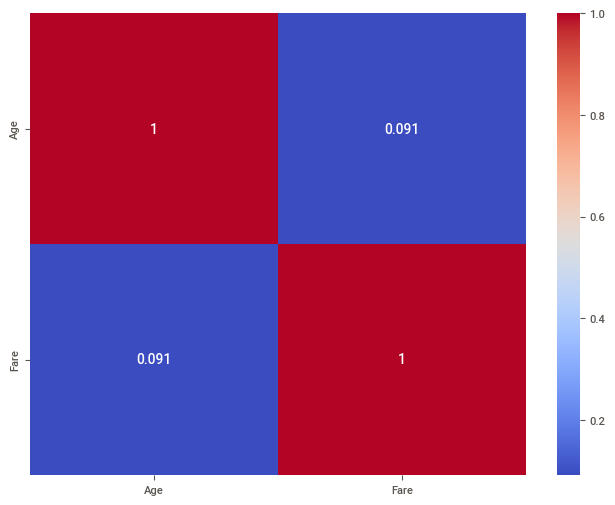

In [46]:
corr = df[['Age','Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
# Heatmap

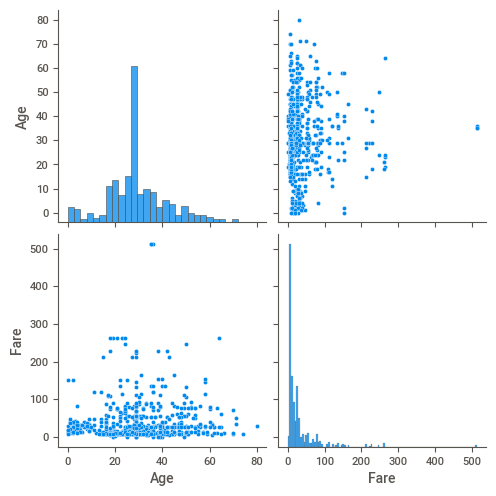

In [47]:
sns.pairplot(df[['Age','Fare']])
plt.show()
# Pairplot